In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
fields = ['eid', '34-0.0', '23104-0.0', '30740-0.0', '4079-0.0', '4080-0.0', '104920-0.0', '104910-0.0', '104900-0.0', 
        '104920-0.0', '104910-0.0', 
        '104900-0.0', '20107-0.0', '20110-0.0', '20111-0.0', 
        '30000-0.0', '30010-0.0', '4194-0.0', '30760-0.0', '30780-0.0', '2443-0.0']
    
ordered_cols = ['ID', 'Year-of-Birth', 'BMI', 'Glucose level', 'Systolic blood pressure', 'Diastolic blood pressure', 'time spent doing light physical activity', 'time spent doing moderate physical activity', 
        'time spent doing vigorous physical activity', 'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings',
        'white blood cell count', 'red blood cell count', 'Pulse rate','HDL cholesterol blood result','LDL cholesterol blood result','diabetes diagnosed']

ordered_cols_with_age = ['ID', 'Age', 'BMI', 'Glucose level', 'Systolic blood pressure', 'Diastolic blood pressure', 'time spent doing light physical activity', 'time spent doing moderate physical activity', 
        'time spent doing vigorous physical activity', 'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings',
        'white blood cell count', 'red blood cell count', 'Pulse rate','HDL cholesterol blood result','LDL cholesterol blood result','diabetes diagnosed']

ukb_fields = ['eid', '34-0.0', '2443-0.0', '4079-0.0', '4080-0.0',
                 '4194-0.0', '20107-0.0', '20110-0.0', '20111-0.0', '23104-0.0', '30000-0.0', '30010-0.0',
                 '30740-0.0', '30760-0.0', '30780-0.0',
                 '104900-0.0', '104910-0.0', '104920-0.0']

ukb_cols = ['ID', 'Year-of-Birth', 'diabetes diagnosed', 'Systolic blood pressure', 'Diastolic blood pressure',
               'Pulse rate', 'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings', 'BMI', 'white blood cell count', 'red blood cell count',
               'Glucose level', 'HDL cholesterol blood result', 'LDL cholesterol blood result',
               'time spent doing vigorous physical activity', 'time spent doing moderate physical activity', 'time spent doing light physical activity']


In [8]:
def create_plot(name, x_name, y_name, x_values, y_values, plot_type='vertical'):
    """
    Creates a plot based on the given data.

    Parameters:
        x_name (str): Label for the x-axis.
        y_name (str): Label for the y-axis.
        x_values (list): List of values for the x-axis.
        y_values (list): List of values for the y-axis.
        plot_type (str, optional): Type of plot to create ('vertical', 'horizontal', or 'pie').
                                   Default is 'vertical'.

    Returns:
        None
    """

    if plot_type not in ['vertical', 'horizontal', 'pie']:
        raise ValueError("Invalid plot type. Choose 'vertical', 'horizontal', or 'pie'.")

    if len(x_values) != len(y_values):
        raise ValueError("The number of x_values and y_values must be the same.")
    bar_width = 0.3
    if plot_type == 'vertical':
        plt.bar(x_values, y_values, width=bar_width)
        for i, value in enumerate(y_values):
            plt.text(i, value, str(value), ha='center', va='bottom')
        if(x_name != ''): plt.xlabel(x_name)
        plt.ylabel(y_name)
    elif plot_type == 'horizontal':
        plt.barh(x_values, y_values, height=bar_width)
        for i, value in enumerate(y_values):
            plt.text(value, i, str(value), ha='left', va='center')
        if(x_name != ''): plt.xlabel(y_name)
        plt.ylabel(x_name)
    elif plot_type == 'pie':
        plt.pie(y_values, labels=x_values, autopct='%1.1f%%')
        plt.axis('equal')
        
    plt.title(name)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

def rank_features_by_importance(model, feature_names):
    # Get the feature importance scores from the first layer of the neural network
    feature_importance_scores = model.layers[1].get_weights()[0]
    
    # Calculate the absolute importance scores
    absolute_importance_scores = np.abs(feature_importance_scores)
    
    # Calculate the average importance score for each feature across all neurons in the first layer
    average_importance_scores = np.mean(absolute_importance_scores, axis=0)
    
    # Create a dictionary to map feature names to their importance scores
    feature_importance_dict = dict(zip(feature_names, average_importance_scores))
    
    # Sort the features based on their importance scores in descending order
    ranked_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    
    return ranked_features

In [6]:
file = 'initial_dataset_with_all_fields2.csv'

In [33]:
# read data
df = pd.read_csv(file)

In [34]:
# rearange the columns
df = df[ordered_cols]

In [35]:
# calculate age
df['Age'] = 2023 - df['Year-of-Birth']
df = df.drop(['Year-of-Birth'], axis=1)
df = df[ordered_cols_with_age]

In [36]:
df.columns

Index(['ID', 'Age', 'BMI', 'Glucose level', 'Systolic blood pressure',
       'Diastolic blood pressure', 'time spent doing light physical activity',
       'time spent doing moderate physical activity',
       'time spent doing vigorous physical activity', 'Illnesses of father',
       'Illnesses of mother', 'Illnesses of siblings',
       'white blood cell count', 'red blood cell count', 'Pulse rate',
       'HDL cholesterol blood result', 'LDL cholesterol blood result',
       'diabetes diagnosed'],
      dtype='object')

In [37]:
# transform family illnesess
df['Illnesses of father'].where(df['Illnesses of father'] >=0, other=0, inplace=True)
df['Illnesses of mother'].where(df['Illnesses of mother'] >=0, other=0, inplace=True)
df['Illnesses of siblings'].where(df['Illnesses of siblings'] >=0, other=0, inplace=True)

In [38]:
# resolve missing numeric parameters
fields_to_mean = ['BMI',
                  'Glucose level',
                  'Systolic blood pressure',
                  'Diastolic blood pressure', 
                  'Pulse rate',
                  'HDL cholesterol blood result', 
                  'LDL cholesterol blood result',
                  'white blood cell count',
                  'red blood cell count'
                 ]
df[fields_to_mean] = df[fields_to_mean].fillna(df[fields_to_mean].mean())

In [39]:
# resolve missing catagorial parameters
fields_to_median = ['Age', 'time spent doing light physical activity', 'time spent doing moderate physical activity', 'time spent doing vigorous physical activity', 
'Illnesses of father', 'Illnesses of mother', 'Illnesses of siblings']
df[fields_to_median] = df[fields_to_median].fillna(df[fields_to_median].median())

In [40]:
# resolve missing labels
df['diabetes diagnosed'].where(df['diabetes diagnosed'] >=0, other=0, inplace=True)
df.dropna(subset=['diabetes diagnosed'], inplace=True)

In [41]:
# save df to csv
df.to_csv('processed_data.csv', index=False)

In [12]:
# load data
df = pd.read_csv('processed_data.csv')

negative_indices = df[df['diabetes diagnosed']==0].index
positive_indices = df[df['diabetes diagnosed']==1].index

print(df.shape[0])
print(len(negative_indices))
print(f'healthy people percent = {(len(negative_indices) / df.shape[0]):.4f}%')

num_to_keep = int(len(negative_indices) * 1 / 10)

print(f'num_to_keep = {num_to_keep}')

random_negative_indices = np.random.choice(negative_indices, num_to_keep, replace=False)
selected_indices = np.concatenate((positive_indices, random_negative_indices))
df = df.loc[selected_indices]

negative_indices = df[df['diabetes diagnosed']==0].index
positive_indices = df[df['diabetes diagnosed']==1].index

print(f'healthy people percent = {(len(negative_indices) / df.shape[0]):.4f}%')
print(f'sick people percent = {(len(positive_indices) / df.shape[0]):.4f}%')
print(f'df.shape = {df.shape[0]}')

502370
475975
healthy people percent = 0.9475%
num_to_keep = 47597
healthy people percent = 0.6433%
sick people percent = 0.3567%
df.shape = 73992


sick mean age: 74.44788785754878
sick min age: 53.0
sick max age: 87.0
sick unique values: [82. 68. 81. 66. 74. 76. 69. 72. 55. 85. 62. 75. 83. 64. 65. 79. 80. 57.
 67. 70. 73. 54. 78. 71. 84. 77. 59. 61. 58. 60. 63. 86. 56. 87. 53.]

healthy mean age: 71.25250437004168
healthy min age: 53.0
healthy max age: 87.0
healthy unique values: [83. 75. 81. 70. 65. 62. 60. 68. 72. 80. 84. 74. 66. 79. 73. 56. 82. 61.
 69. 58. 64. 63. 59. 76. 77. 55. 71. 78. 57. 67. 54. 85. 53. 86. 87.]


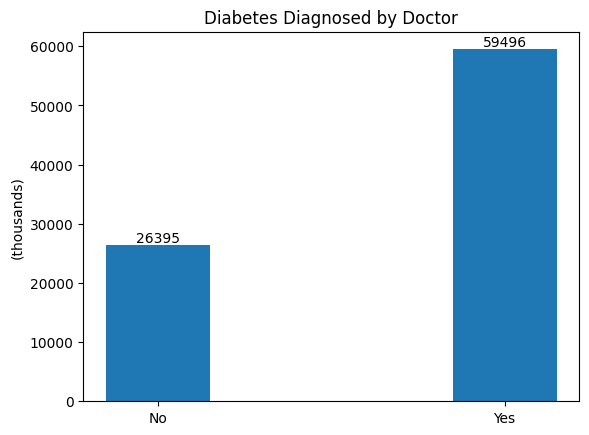

In [6]:
sick = df.loc[df['diabetes diagnosed']==1]
print(f"sick mean age: {sick['Age'].mean()}")
print(f"sick min age: {sick['Age'].min()}")
print(f"sick max age: {sick['Age'].max()}")
print(f"sick unique values: {sick['Age'].unique()}\n")

healthy = df.loc[df['diabetes diagnosed']==0]
print(f"healthy mean age: {healthy['Age'].mean()}")
print(f"healthy min age: {healthy['Age'].min()}")
print(f"healthy max age: {healthy['Age'].max()}")
print(f"healthy unique values: {healthy['Age'].unique()}")

num_positive = len(positive_indices)
num_negative = len(negative_indices)

create_plot('Diabetes Diagnosed by Doctor', '', '(thousands)', ['No', 'Yes'], [num_positive, num_negative], 'vertical')

In [13]:
# split the data into train and test
X = df.drop(columns=['ID', 'Age', 'diabetes diagnosed'])
#X = df.drop(columns=['Glucose level'])
y = df['diabetes diagnosed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# create and train the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# define a checkpoint to save the model's weights
import os
checkpoint_path = 'training_4/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose = 1)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[cp_callback])

Epoch 1/50
1660/1665 [============================>.] - ETA: 0s - loss: 0.3899 - accuracy: 0.8319
Epoch 1: saving model to training_4/cp.ckpt
1665/1665 [==============================] - 3s 1ms/step - loss: 0.3899 - accuracy: 0.8318 - val_loss: 0.3766 - val_accuracy: 0.8390
Epoch 2/50
1646/1665 [============================>.] - ETA: 0s - loss: 0.3706 - accuracy: 0.8413
Epoch 2: saving model to training_4/cp.ckpt
1665/1665 [==============================] - 2s 1ms/step - loss: 0.3707 - accuracy: 0.8412 - val_loss: 0.3717 - val_accuracy: 0.8405
Epoch 3/50
1637/1665 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8436
Epoch 3: saving model to training_4/cp.ckpt
1665/1665 [==============================] - 2s 1ms/step - loss: 0.3652 - accuracy: 0.8431 - val_loss: 0.3710 - val_accuracy: 0.8383
Epoch 4/50
1650/1665 [============================>.] - ETA: 0s - loss: 0.3614 - accuracy: 0.8456
Epoch 4: saving model to training_4/cp.ckpt
1665/1665 [======================

463/463 [==============================] - 1s 921us/step - loss: 0.3681 - accuracy: 0.8410
Test loss: 0.3681, Test accuracy: 0.8410
463/463 [==============================] - 0s 810us/step


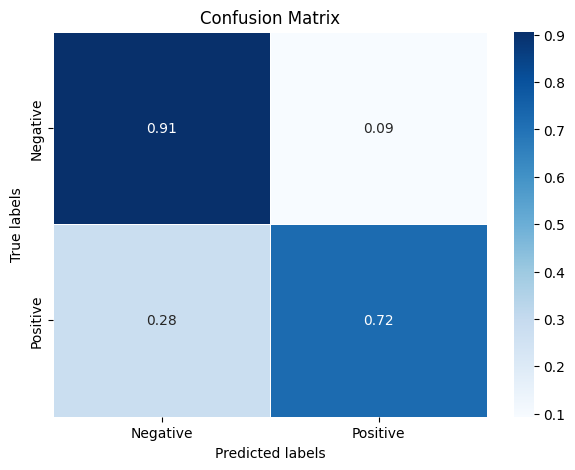

In [15]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred)

# Compute and print the confusion matrix
plot_confusion_matrix(y_test, y_pred, ['Negative', 'Positive'])



In [10]:
features = [feature for feature in X.columns]
rank_features_by_importance(model, features)

[('time spent doing moderate physical activity', 0.18599382),
 ('BMI', 0.1835668),
 ('red blood cell count', 0.18210451),
 ('Illnesses of siblings', 0.18129109),
 ('time spent doing vigorous physical activity', 0.1709898),
 ('time spent doing light physical activity', 0.16796328),
 ('Systolic blood pressure', 0.16126539),
 ('Diastolic blood pressure', 0.16024078),
 ('white blood cell count', 0.15558656),
 ('Illnesses of father', 0.15230408),
 ('Pulse rate', 0.15167652),
 ('HDL cholesterol blood result', 0.14666791),
 ('LDL cholesterol blood result', 0.14257383),
 ('Illnesses of mother', 0.1283066)]